# BTC Prediction (EDA Stage)

### This notebook contains:
- An exploratory data analysis of BTC prices dataframe
- Visual representation of the data and distributions
- Gaining information that will be useful for modeling

### Storytelling

BTC and cryptocurrency as a whole is a relatively new "asset class", acquiring recognition from investors and institutions globally. Being that it is an emerging market, not much is known about how the prices and exchange rates fluctuate. The price of BTC is extremely volatile, presenting many potential oppurtunities to make money as an investor or trader. By identifying what features drive price movement via a graphical representation through exploratory analysis we can extrapolate that information to predict prices using distinct data architectures. With our objective of predicting BTC prices, the investigation throughout this stage should reveal exactly how to do just that. 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import pandas as pd
from scipy.stats import t
import numpy as np

In [3]:
df = pd.read_csv('data/btc_prediction_datawranglingStage.csv', parse_dates=True)
sns.set(style='ticks')

In [4]:
df.shape

(441, 15)

In [5]:
df.head()

,Date,open,high,low,close,closeFUT,volume,rsi,ema_short,ema_long,atr,adx,obv,tweet_sentiment,close_nextday
0,2019-09-02,9723.59,10450.00,9712.50,10340.00,10341.07,44740.25,51.381478,10164.518939,10452.265343,530.693553,19.114750,225053.863244,-1.0,10615.28
1,2019-09-03,10340.00,10773.00,10272.00,10615.28,10610.72,47998.38,54.904081,10207.448563,10458.658074,528.572585,18.426961,273052.240025,0.5,10567.02
2,2019-09-04,10611.85,10799.00,10369.89,10567.02,10568.07,43943.89,54.163174,10241.693462,10462.907561,521.468114,17.842351,229108.350999,0.5,10564.49
3,2019-09-05,10565.92,10900.00,10450.00,10564.49,10565.04,33970.96,54.121941,10272.435990,10466.891187,516.363249,17.516155,195137.390360,0.5,10298.73
4,2019-09-06,10563.13,10905.87,10150.00,10298.73,10294.96,58799.64,49.830575,10274.940181,10460.296630,533.470874,16.423958,136337.749401,0.0,10455.88


In [6]:
mean = round(np.mean(df.close), 2)
std = round(np.std(df.close, ddof=1),2)
print('Mean:', mean,
      '\nStd:', std)

Mean: 9367.31 
Std: 1965.93


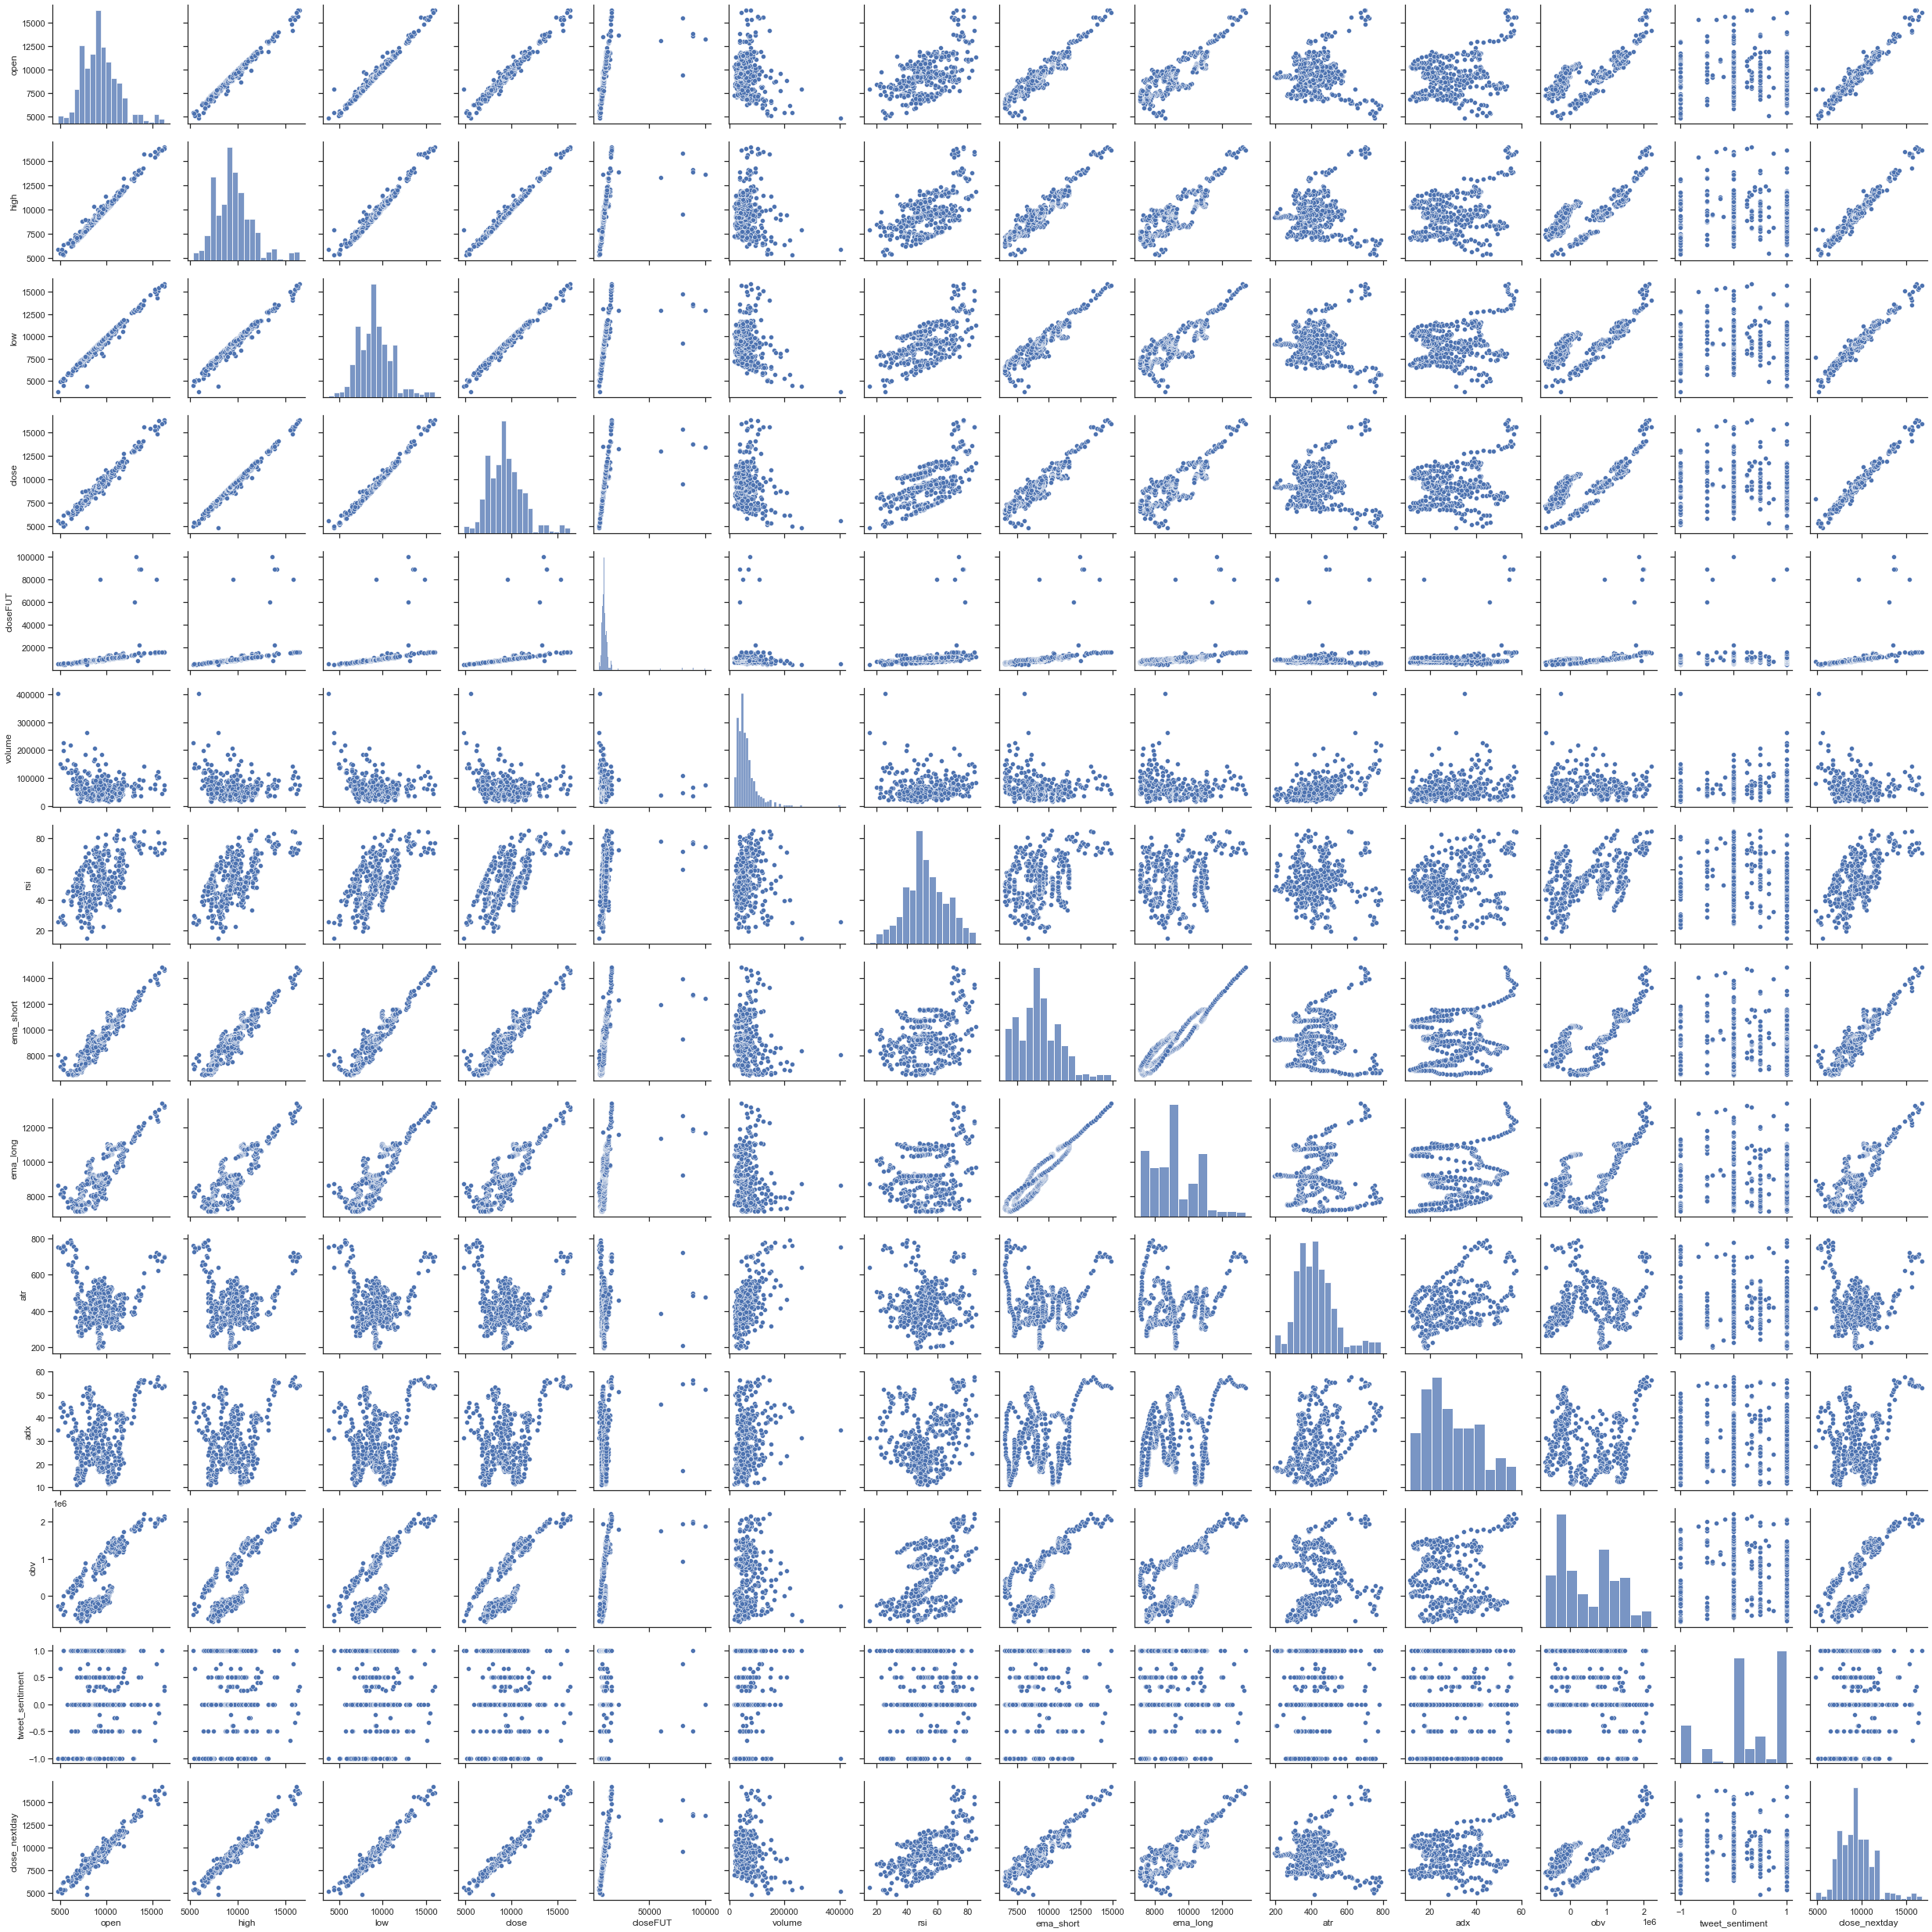

In [7]:
# Pairplot to view variable patterns and correlations 

_ = sns.pairplot(df)

In [8]:
# new dataframe without target

df2 = df.drop('close_nextday', 1)

In [9]:
df2.head(1)

,Date,open,high,low,close,closeFUT,volume,rsi,ema_short,ema_long,atr,adx,obv,tweet_sentiment
0,2019-09-02,9723.59,10450.0,9712.5,10340.0,10341.07,44740.25,51.381478,10164.518939,10452.265343,530.693553,19.11475,225053.863244,-1.0


## Correlation Threshold

- Low correlation = 0.2 - 0.4
- Mid correlation = 0.4 - 0.6
- High correlation = 0.6 - 0.8

Each of these three levels are a threshold of correlation respectively. The higher the number, the more likely these two variables are correlated with eachother.

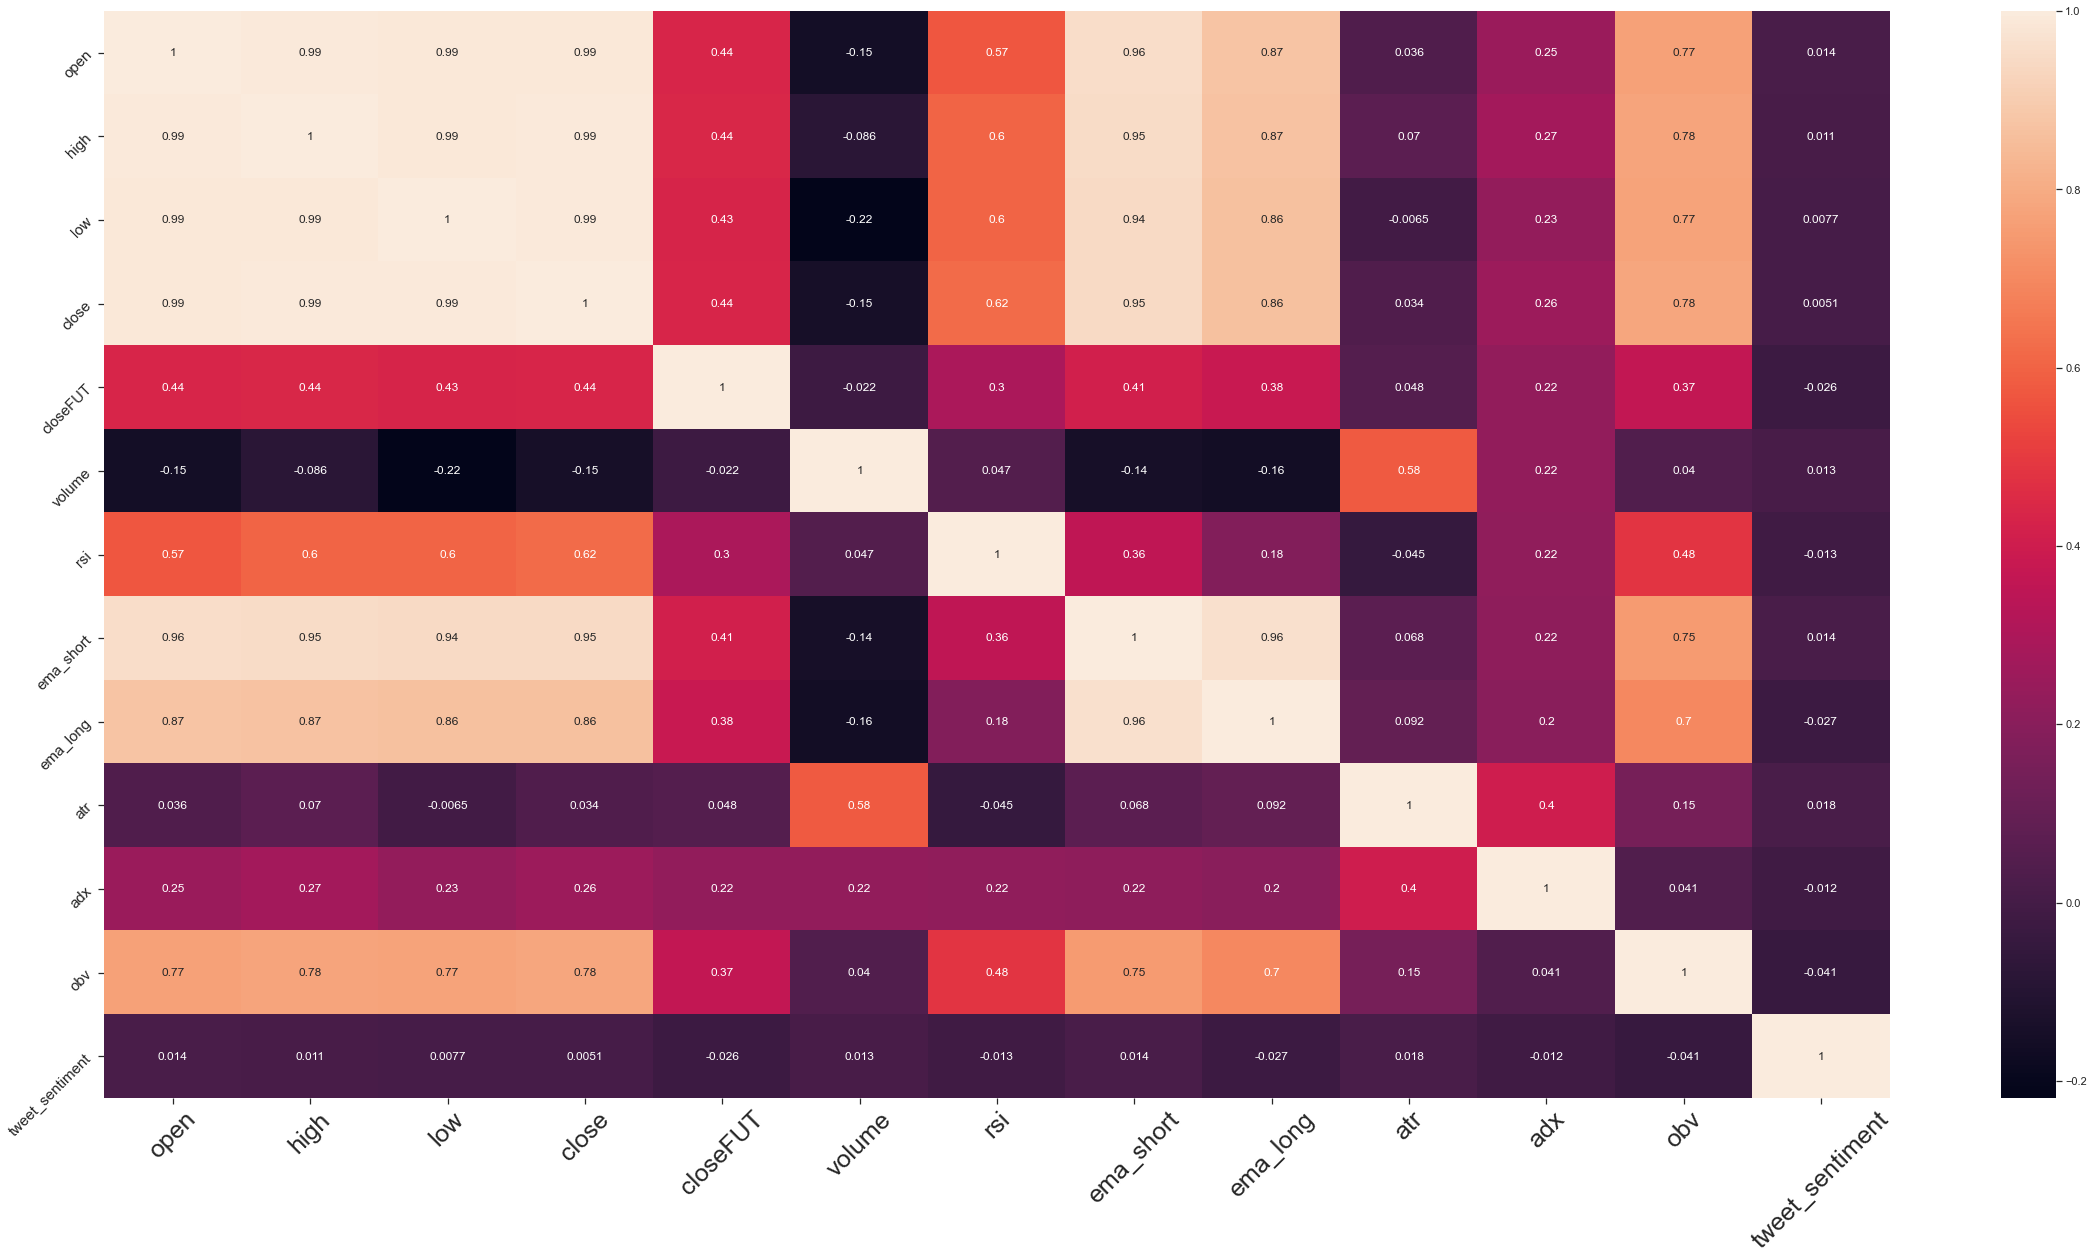

In [10]:
# correlation heatmap without target included

_ = plt.figure(figsize=(40,20))
_ = sns.heatmap(df2.corr(), annot=True)
_ = plt.tick_params(labelsize=25, axis='x', labelrotation = 45)
_ = plt.tick_params(labelsize=15, axis='y', labelrotation = 45)

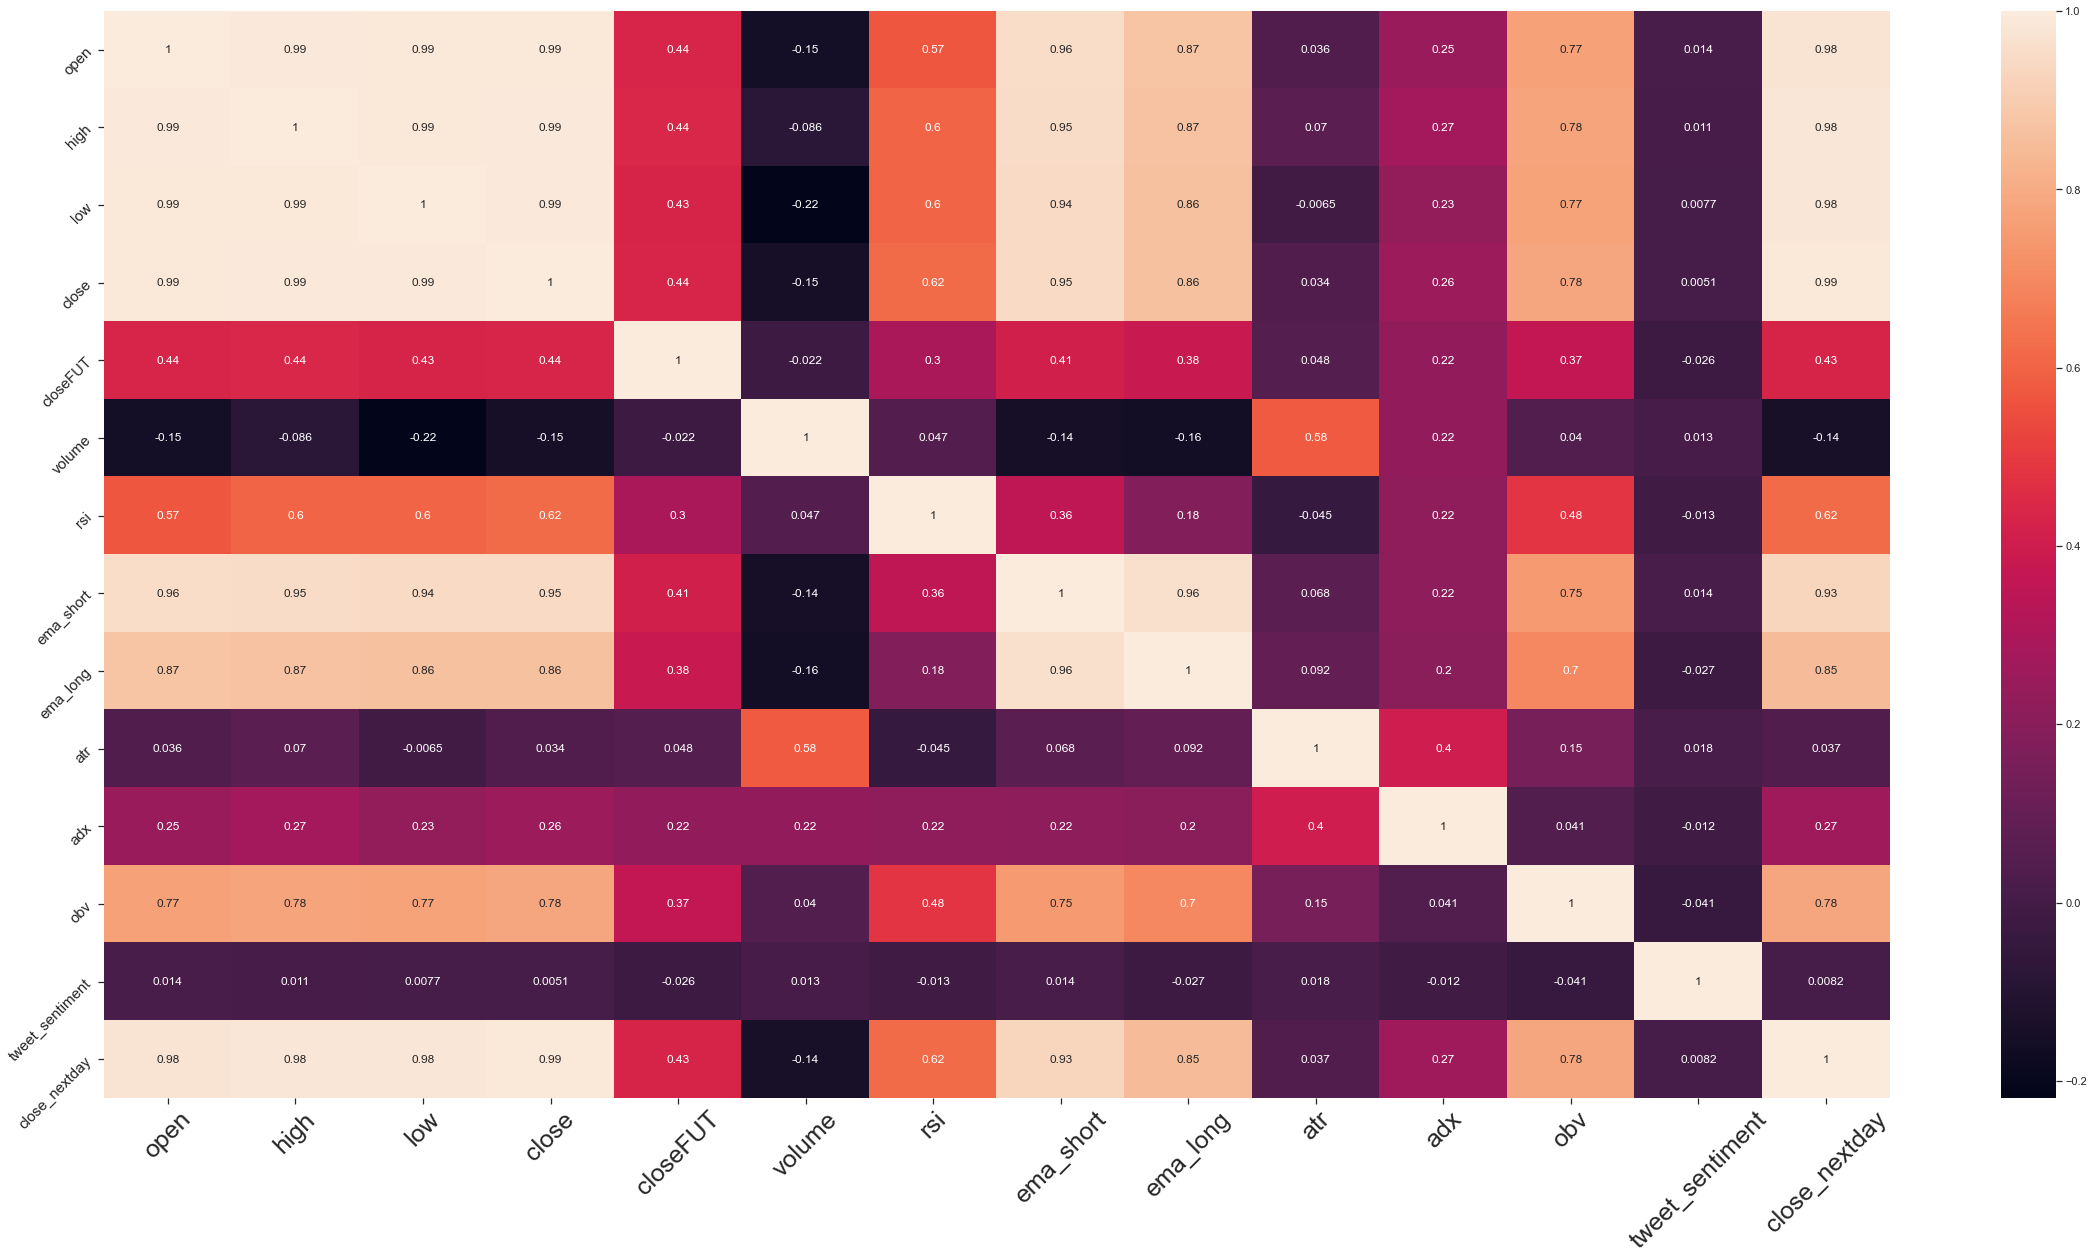

In [11]:
# correlation heatmap with target included

_ = plt.figure(figsize=(40,20))
_ = sns.heatmap(df.corr(), annot=True)
_ = plt.tick_params(labelsize=25, axis='x', labelrotation = 45)
_ = plt.tick_params(labelsize=15, axis='y', labelrotation = 45)

In [15]:
corr = df[['open', 'high', 'low','close', 'close_nextday']].corr()

c1 = corr.abs().unstack()
c2 = c1.sort_values(ascending = False)
c2 = c2.iloc[13:14]

f = open('data/highest_corr_target.txt', 'a')
f.write("print(c2)")
f.close

<function TextIOWrapper.close()>

## Exploring Variable Correlations

Variables that have a high correlation:
- OBV/Close
- ATR/Volume
- OBV/Ema_short

Variables that have low correlation:
- Ema_short/volume
- Ema_long/volume
- OBV/tweet_sentiment
- ATR/RSI

### Initial Questions:
- Why are the high, low, open and close prices (OHLC) so highly correlated?

It is said that when the open and close are far apart it shows strong momentum, and when the open and close are close together it shows indecision or weak momentum. The high and low show the full price range of the period. This knowledge can be useful in assessing volatility.

    - Can the OHLC distances be used to show correlation in conjunction with other indicators such as the RSI or even strengthen the ATR? Since the ATR is a measure of volatility can these measurements be utilized further?
    
- How are the correlated variables distributed in density over the time range of historical data?
- Is there any linear assumptions or normality assumptions within the predictors and target?
- Is there a possibility for any "data leakage"?

In [11]:
# subset original dataframe to examine OHLC levels from random range

df3 = df.drop(['close_nextday', 'closeFUT', 'rsi', 'ema_long', 'ema_short', 'obv', 'atr', 'adx', 'tweet_sentiment'], axis=1)
df3 = df3[60:80]

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 60 to 79
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   open    20 non-null     float64
 2   high    20 non-null     float64
 3   low     20 non-null     float64
 4   close   20 non-null     float64
 5   volume  20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


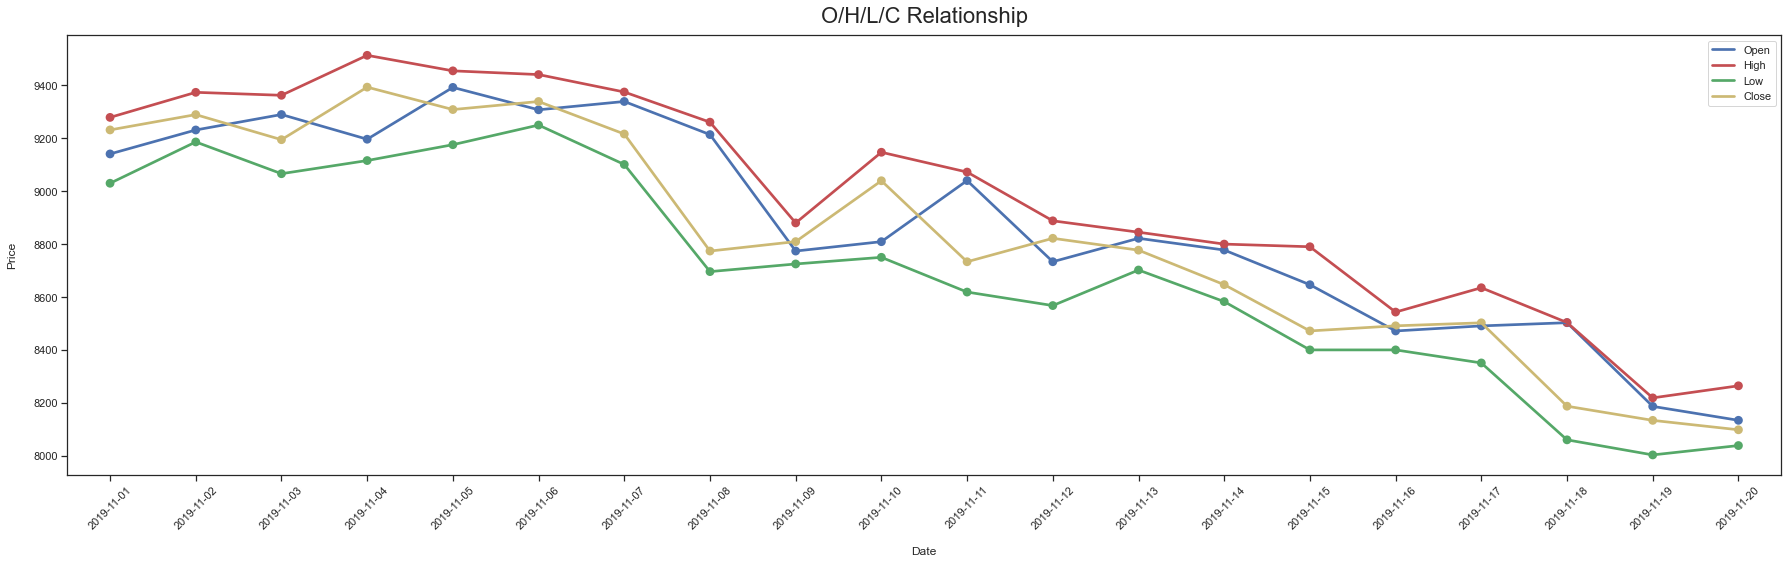

In [13]:
# relationship of open, high, low, close prices

fig, ax = plt.subplots(figsize=(25, 8))

sns.pointplot(data=df3, x='Date', y='open', color="b", label='open')
sns.pointplot(data=df3, x='Date', y='high', color="r", label='high')
sns.pointplot(data=df3, x='Date', y='low', color="g", label='low')
sns.pointplot(data=df3, x='Date', y='close', color="y", label='close')

ax.legend(handles=ax.lines[::len(df3)+1], labels=["Open","High","Low", "Close"])
ax.set_title('O/H/L/C Relationship', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Price', labelpad=16)


t=plt.xticks(rotation=45)
plt.tight_layout()

In [14]:
# subset original dataframe to examine variable relationship across time series

df4 = df.drop(['open', 'high', 'low'], axis=1)
df4 = df4[60:100]

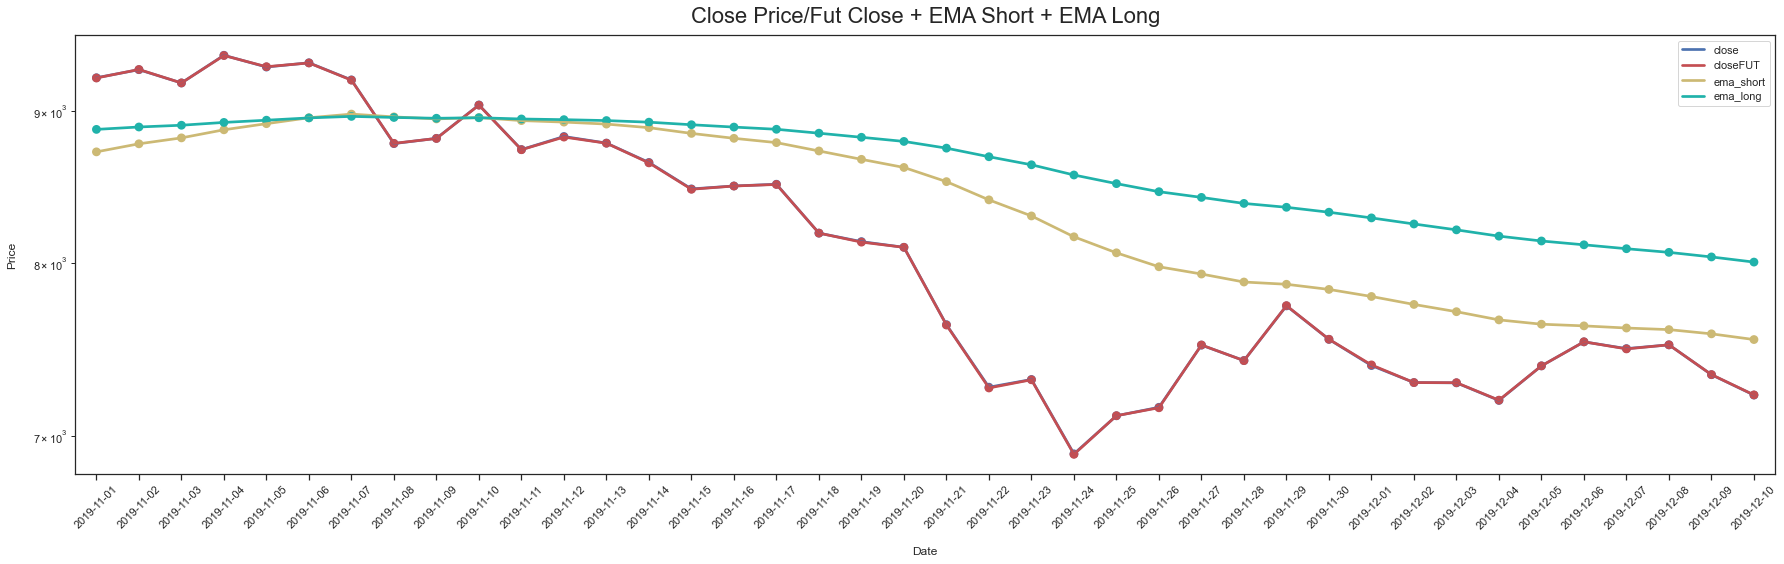

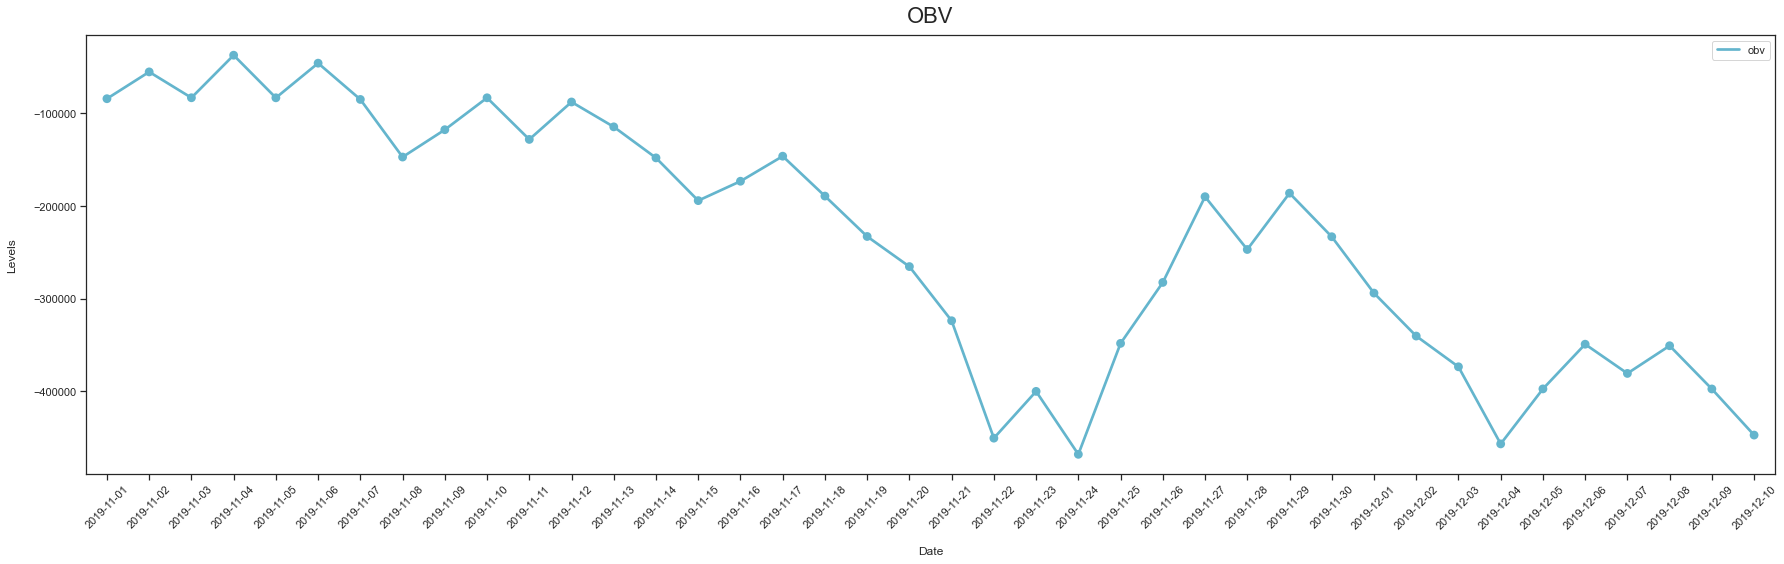

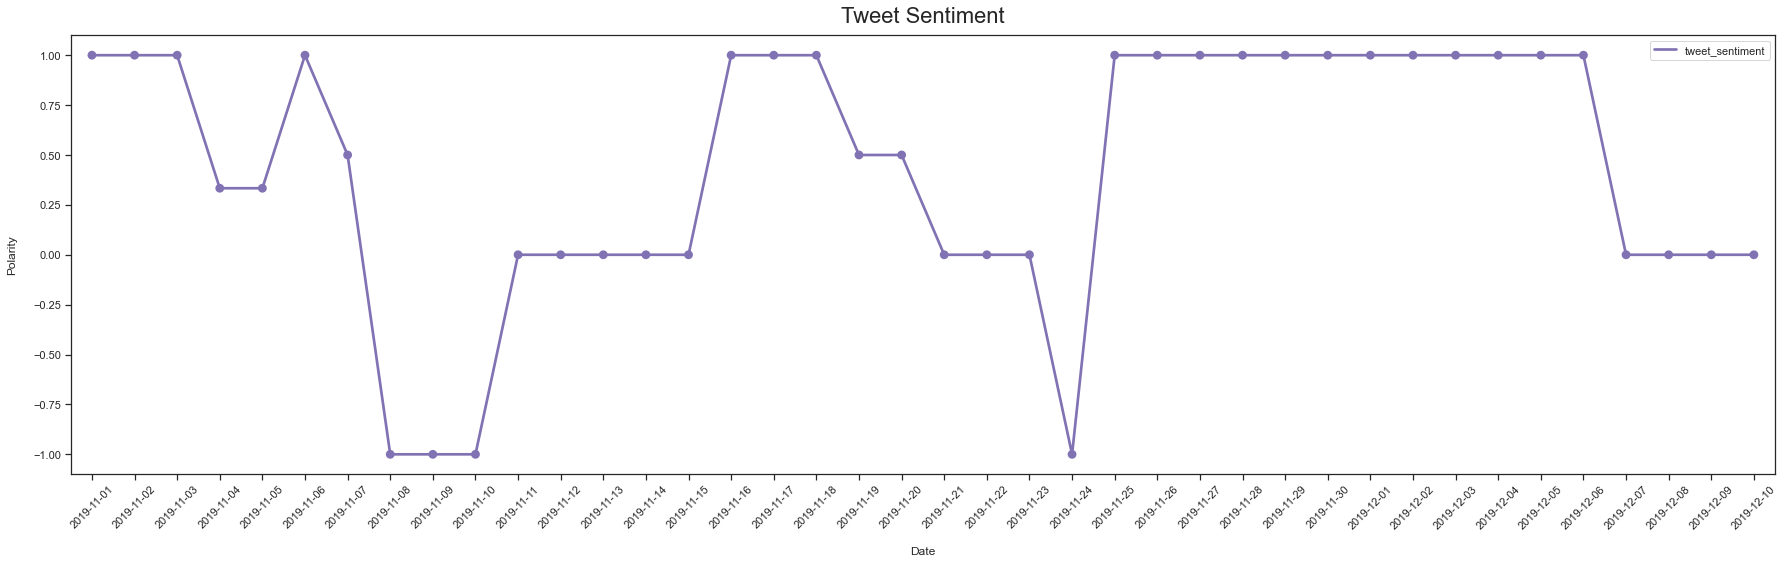

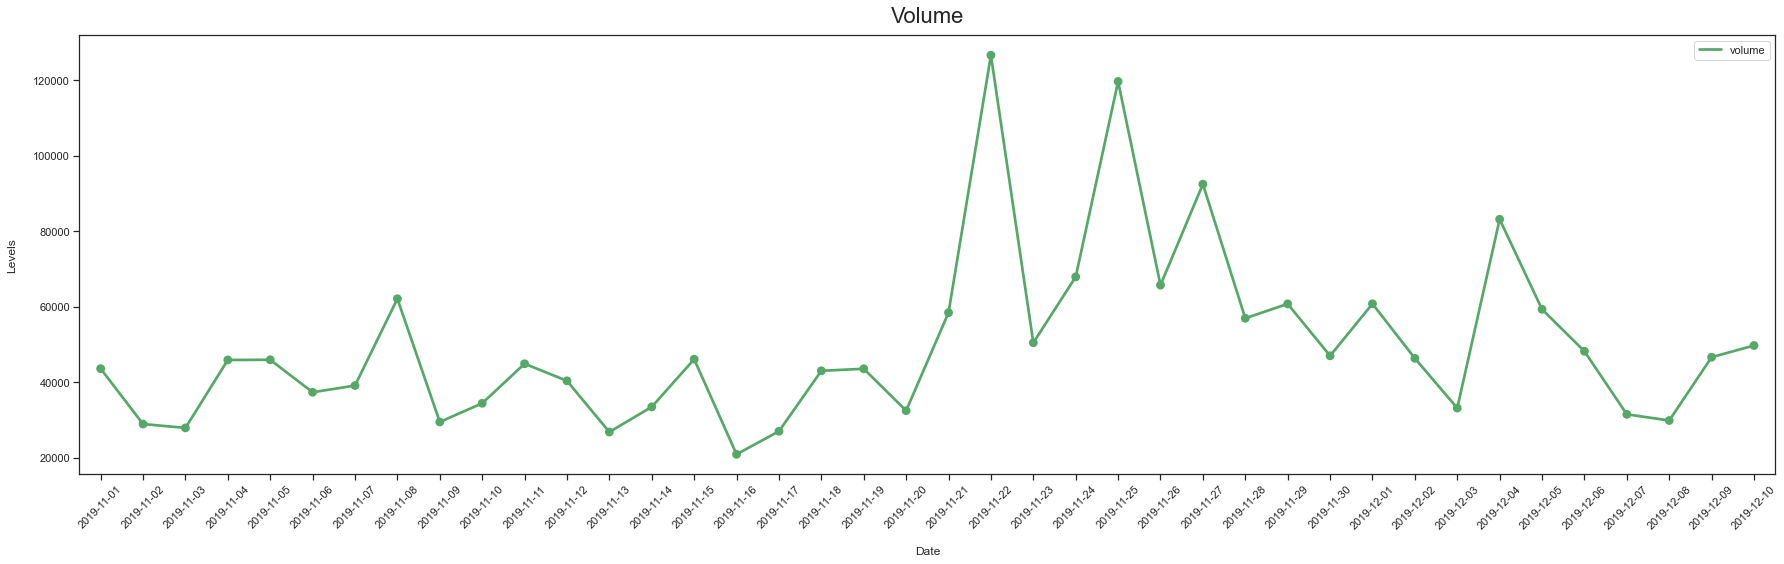

In [15]:
# Close prices vs ema long/short

fig, ax = plt.subplots(figsize=(25,8))

sns.pointplot(data=df4, x='Date', y='close', color="b", label='close')
sns.pointplot(data=df4, x='Date', y='closeFUT', color="r", label='closeFUT')

sns.pointplot(data=df4, x='Date', y='ema_short', color="y", label='ema_short')
sns.pointplot(data=df4, x='Date', y='ema_long', color="lightseagreen", label='ema_long')

ax.legend(handles=ax.lines[::len(df4)+1], labels=["close","closeFUT", "ema_short", "ema_long"])
ax.set_title('Close Price/Fut Close + EMA Short + EMA Long', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Price', labelpad=16)

ax.set(yscale="log")
t=plt.xticks(rotation=45)
plt.tight_layout()

# OBV

fig, ax = plt.subplots(figsize=(25,8))
sns.pointplot(data=df4, x='Date', y='obv', color="c", label='obv')

ax.legend(handles=ax.lines[::len(df4)+1], labels=["obv"])
ax.set_title('OBV', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Levels', labelpad=16)

t=plt.xticks(rotation=45)
plt.tight_layout()

# Tweet Sentiment

fig, ax = plt.subplots(figsize=(25,8))
sns.pointplot(data=df4, x='Date', y='tweet_sentiment', color="m", label='tweet_sentiment')

ax.legend(handles=ax.lines[::len(df4)+1], labels=["tweet_sentiment"])
ax.set_title('Tweet Sentiment', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Polarity', labelpad=16)

t=plt.xticks(rotation=45)
plt.tight_layout()

# Volume

fig, ax = plt.subplots(figsize=(25,8))
sns.pointplot(data=df4, x='Date', y='volume', color="g", label='volume')

ax.legend(handles=ax.lines[::len(df4)+1], labels=["volume"])
ax.set_title('Volume', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Levels', labelpad=16)

t=plt.xticks(rotation=45)
plt.tight_layout()

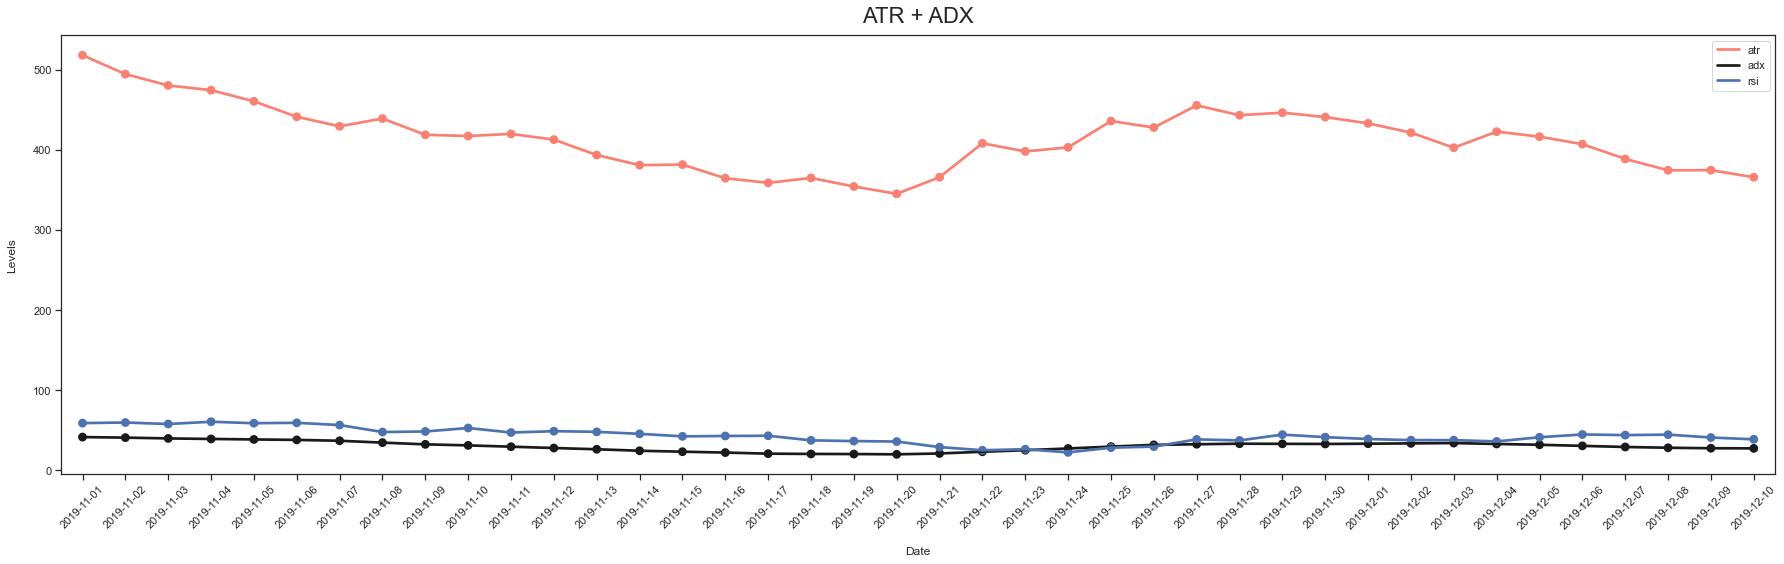

In [16]:
# ATR vs ADX vs RSI

fig, ax = plt.subplots(figsize=(25,8))

sns.pointplot(data=df4, x='Date', y='atr', color="salmon", label='atr')
sns.pointplot(data=df4, x='Date', y='adx', color="k", label='adx')
sns.pointplot(data=df4, x='Date', y='rsi', color="b", label='rsi')

ax.legend(handles=ax.lines[::len(df4)+1], labels=["atr", "adx", "rsi"])
ax.set_title('ATR + ADX', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Levels', labelpad=16)


t=plt.xticks(rotation=45)
plt.tight_layout()

#### Time Series Line Plot Findings

By comparing the line plots between the variable levels over the selected range, we can see that the "tweet_sentiment" is almost directly correlated to the OBV for each day. As the polarity becomes more negative, the OBV begins to fall. Even more interesting we can see a connection between OBV, tweet sentiment and price, all three of which show downward movement parallel to eachother. Further, we can see an inverse relationship between volume and OBV in relation to the close price. As volume spikes, a large jump in close price is visible. It should also be noted that the ATR levels rise in conjunction with close price, however, the ATR does not account for the volatility spikes within the price action. Yet, there seems to be an inverse relationship between the ATR and the EMAs, more specifically the EMA short period. 

## Density Distributions Between Variables

Using seaborn to generate regplots, kdeplots, jointplots we can further examine the relationship between the correlated variables identified from our heatmap. 

#### Regplots:

- Plots the relationship between two variables and uses a linear regression line to view trend direction.

#### KDEplots:

- A non-parametric way of estimating the probability density function (PDF) of a random variable. To guess the density function that describes the randomness of the data.

#### Jointplots:

- A combination of regplots and KDEplots. It allows us to visualize a scatter plot of two different columns with KDE in a linear regression line.

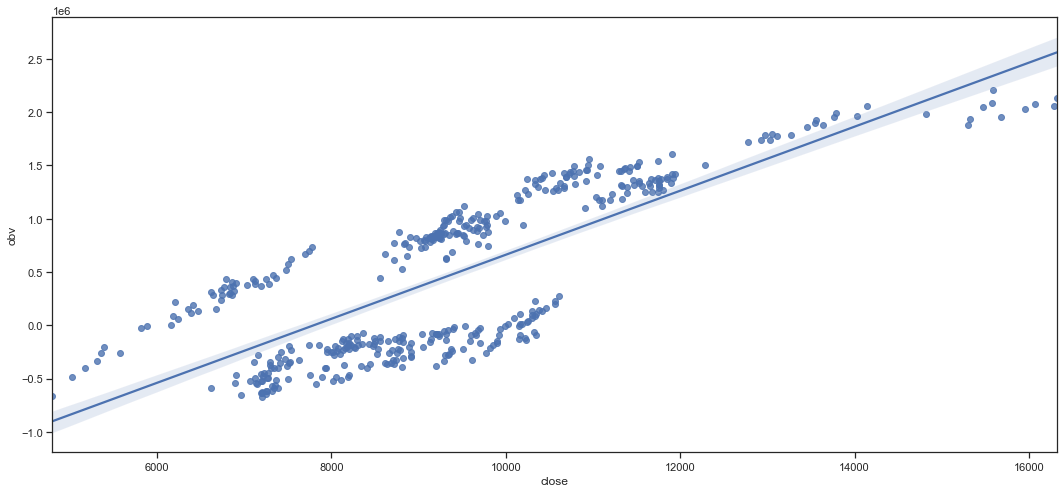

In [50]:
fig, ax = plt.subplots(figsize=(18,8))

_ = sns.regplot(x='close',y='obv',data=df)

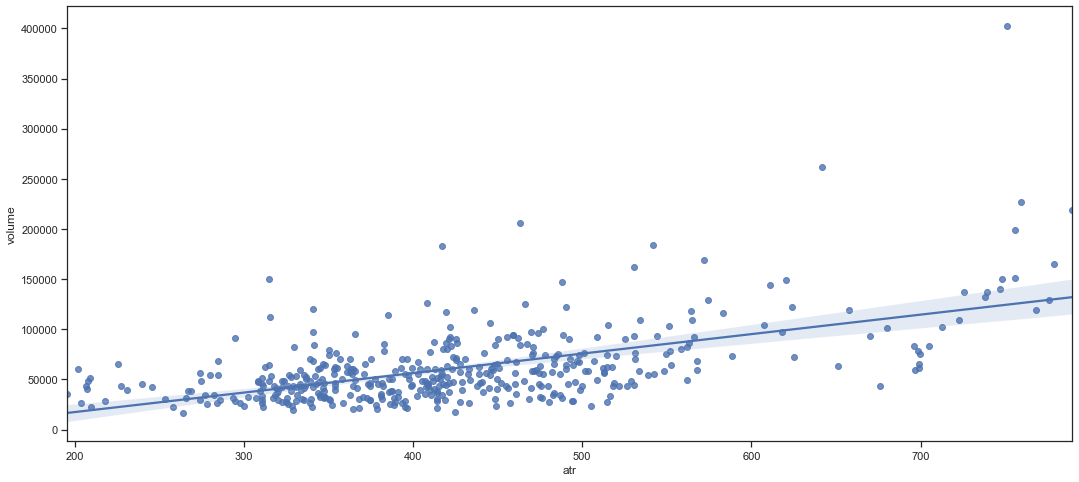

In [60]:
fig, ax = plt.subplots(figsize=(18,8))

_ = sns.regplot(x='atr',y='volume',data=df)

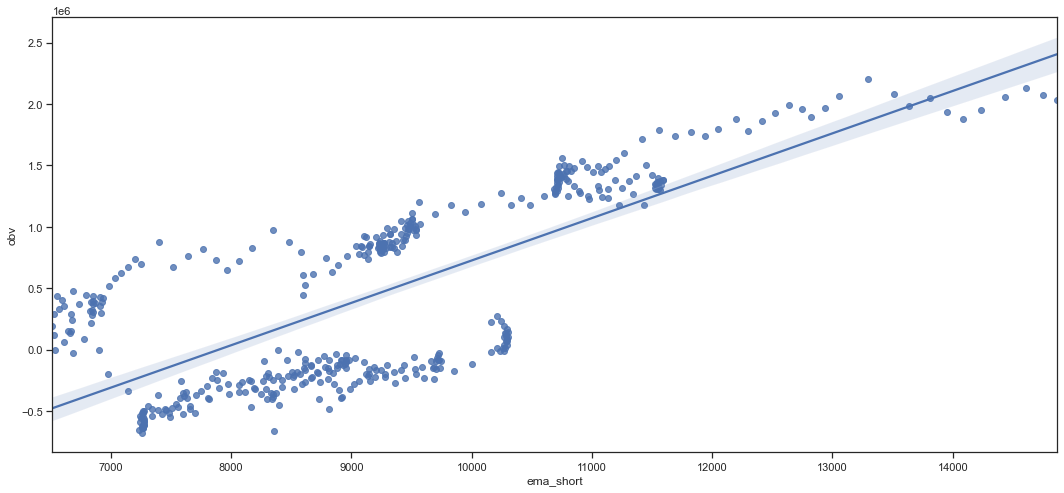

In [61]:
fig, ax = plt.subplots(figsize=(18,8))

_ = sns.regplot(x='ema_short',y='obv',data=df)

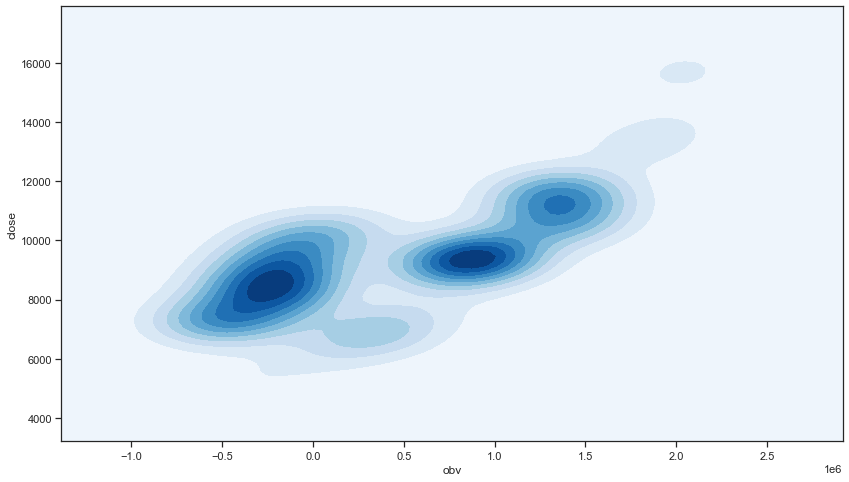

In [59]:
fig, ax = plt.subplots(figsize=(14,8))

_ = sns.kdeplot(df2['obv'],df2['close'],shade=True,cmap="Purples_d")
_ = sns.kdeplot(df2['obv'],df2['close'],shade=True,cmap="Blues")
plt.show()

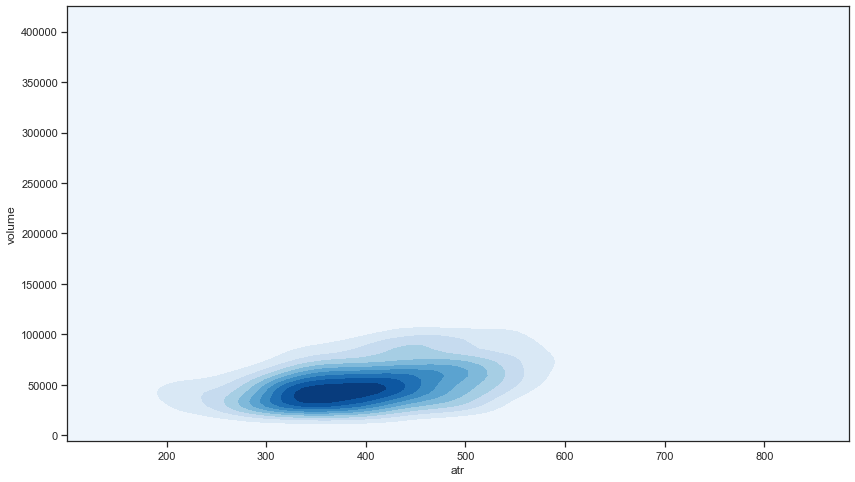

In [58]:
fig, ax = plt.subplots(figsize=(14,8))

_ = sns.kdeplot(df2['atr'],df2['volume'],shade=True,cmap="Purples_d")
_ = sns.kdeplot(df2['atr'],df2['volume'],shade=True,cmap="Blues")
plt.show()

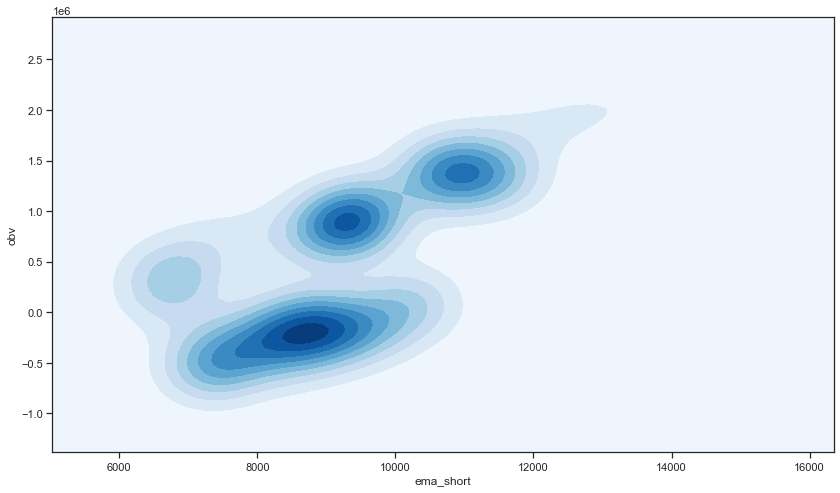

In [57]:
fig, ax = plt.subplots(figsize=(14,8))

_ = sns.kdeplot(df['ema_short'],df['obv'],color='blue',shade=True, cmap="Blues")

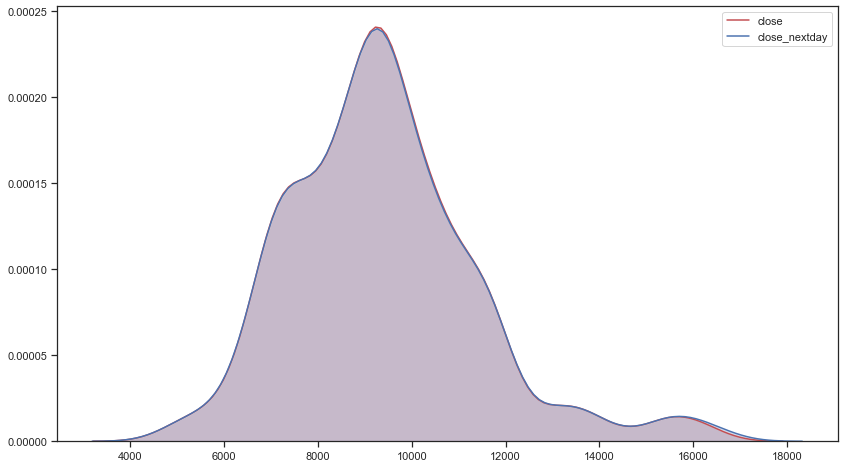

In [56]:
fig, ax = plt.subplots(figsize=(14,8))

_ =sns.kdeplot(df['close'], shade=True, color="r")
_ =sns.kdeplot(df['close_nextday'], shade=True, color="b")

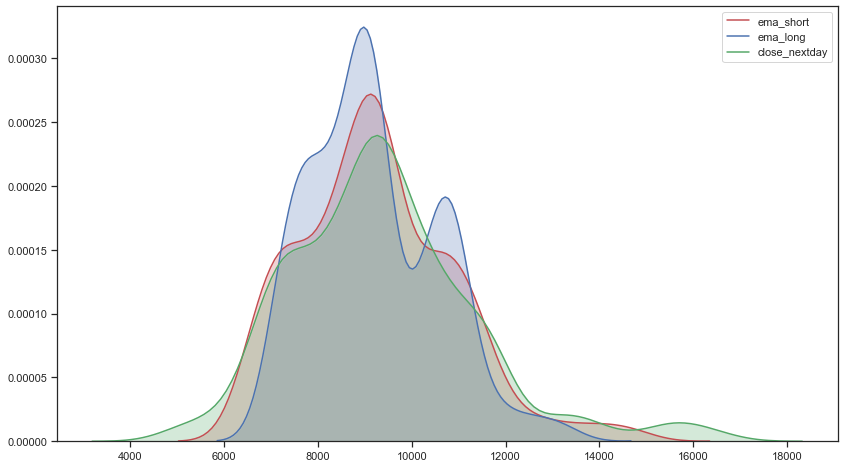

In [55]:
fig, ax = plt.subplots(figsize=(14,8))

_ =sns.kdeplot(df['ema_short'], shade=True, color="r")
_ =sns.kdeplot(df['ema_long'], shade=True, color="b")
_ =sns.kdeplot(df['close_nextday'], shade=True, color="g")

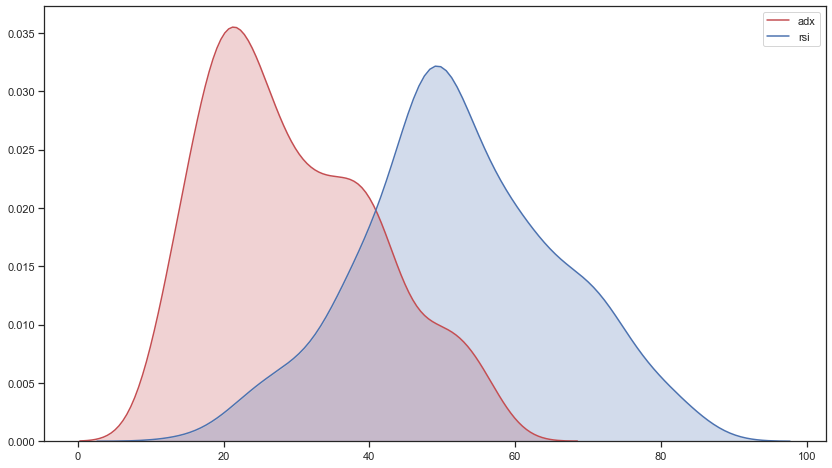

In [54]:
fig, ax = plt.subplots(figsize=(14,8))

_ =sns.kdeplot(df['adx'], shade=True, color="r")
_ =sns.kdeplot(df['rsi'], shade=True, color="b")

## Linearity Assumptions Between Variables and Target

- Checking distribution (uniform/multimodal)
- Visually understand how variables correlate to target predictor

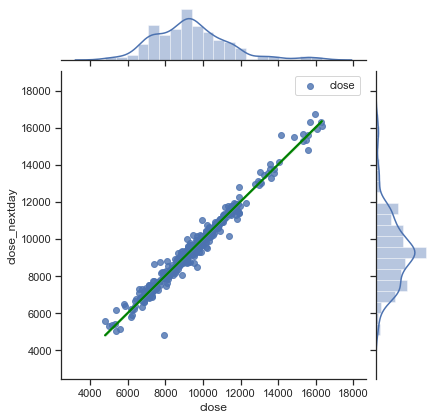

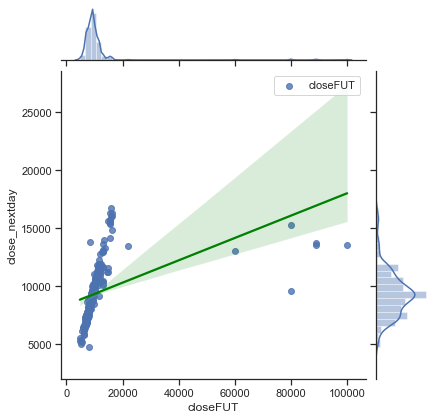

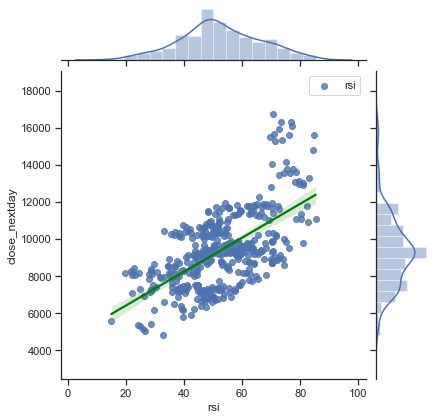

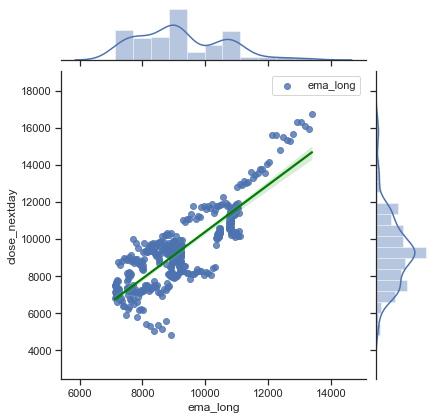

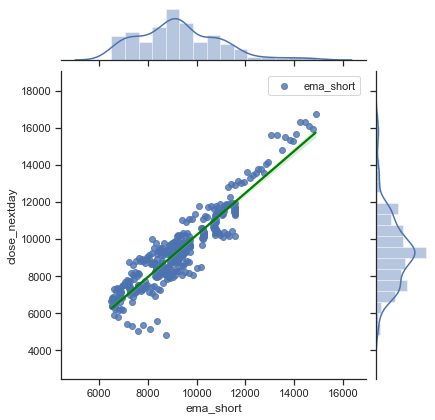

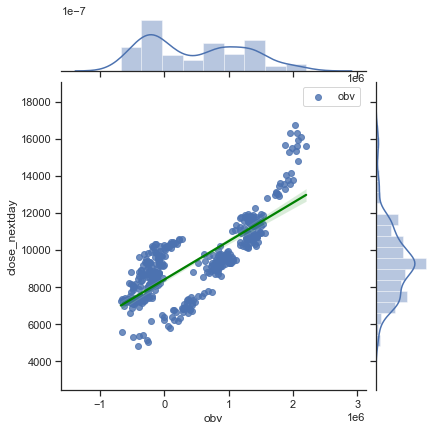

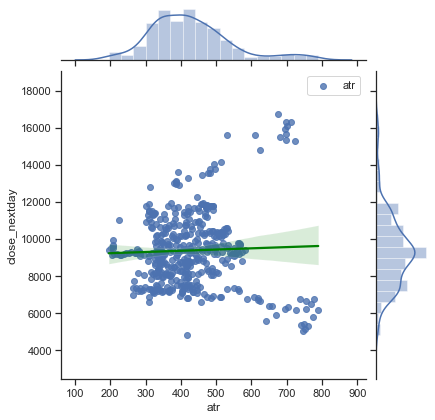

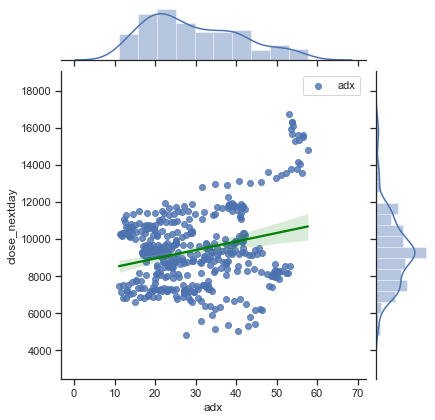

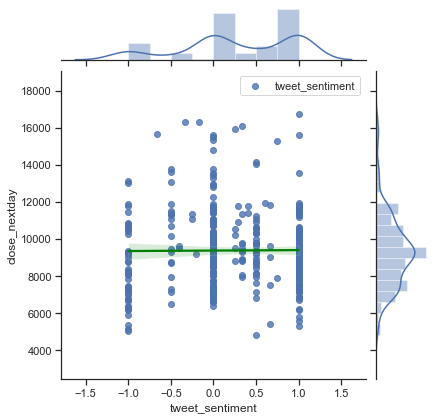

In [53]:
for column in ['close', 'closeFUT', 'rsi', 'ema_long', 'ema_short', 'obv', 'atr', 'adx', 'tweet_sentiment']:
    sns.jointplot(x=column, y='close_nextday',
                  data=df,
                  kind='reg',
                  label=column,
                  joint_kws={'line_kws': {'color':'green'}})
    plt.legend()
    plt.show()

In [45]:
# export csv for modeling

btc_df_notarget = df.drop('close_nextday', 1)
btc_df_notarget.to_csv('data/btc_df_notarget.csv')

In [46]:
# export csv for modeling

btc_df_target = df
btc_df_target.to_csv('data/btc_df_target.csv')

In [47]:
# export csv for modeling - A

btc_df_corrVariables = df.drop(['open', 'high', 'low', 'closeFUT', 'rsi', 'adx'], 1)
btc_df_corrVariables.to_csv('data/btc_df_corrVariables.csv')

In [63]:
# export csv for modeling - B

btc_df_corrVariables_notarget = btc_df_corrVariables.drop('close_nextday', 1)
btc_df_corrVariables_notarget.to_csv('data/btc_df_corrVariables_notarget.csv')

In [48]:
# export csv for modeling 

btc_df_OHLC_atr = df.drop(['closeFUT', 'volume', 'rsi', 'ema_short', 'ema_long', 'adx', 'obv', 'tweet_sentiment'], 1)
btc_df_OHLC_atr.to_csv('data/btc_df_OHLC_atr.csv')

## Conclusion

Through this exploratory data analysis (EDA) we were able to disect the BTC data and derive some interesting results. To recap what we explored, the visual correlation between all variables using a pairplot and then used a heatmap to identify our correlation threshold. The threshold for a highly correlated variable pair was between 0.6 and 0.8. Using that threshold we identified the pairs, OBV/close, ema_short/OBV, and ATR/Volume. Aside from using the heatmap to generate feature usability within our future models we can see various relationships between tweet sentiment, OBV, close price, atr and the EMAs from the line plots. Knowing the relationships between all variables, we then explored the relationship between these identified variables through KDE plots. These KDE plots showed us the distribution of the variables parallel to our target, as well as linear relationships.

From the KDE plot analysis we found that:
- Tweet sentiment has no linear relationship to target
- OBV has linear relationship to target and close price
- Both ema_short and ema_long have linear relationship to target
- RSI has mild to zero linear relationship to target
- Close price is directly correlated to target

Since the close price for the given day is foretelling of target (close_nextday) with extreme accuracy, one should be weary that this might be a result of data leakage. However, given that the potential "trader" does know the close price before predictive target price is known it might not be a potential cause of "data leakage". 